<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#6.-학습-관련-기술들" data-toc-modified-id="6.-학습-관련-기술들-1">6. 학습 관련 기술들</a></span><ul class="toc-item"><li><span><a href="#6.1-매개변수-갱신" data-toc-modified-id="6.1-매개변수-갱신-1.1">6.1 매개변수 갱신</a></span><ul class="toc-item"><li><span><a href="#[모험가-이야기]" data-toc-modified-id="[모험가-이야기]-1.1.1">[모험가 이야기]</a></span></li><li><span><a href="#[확률적-경사-하강법(SGD)" data-toc-modified-id="[확률적-경사-하강법(SGD)-1.1.2">[확률적 경사 하강법(SGD)</a></span></li><li><span><a href="#[SGD의-단점]" data-toc-modified-id="[SGD의-단점]-1.1.3">[SGD의 단점]</a></span></li><li><span><a href="#[모멘텀]" data-toc-modified-id="[모멘텀]-1.1.4">[모멘텀]</a></span></li><li><span><a href="#[AdaGrid]" data-toc-modified-id="[AdaGrid]-1.1.5">[AdaGrid]</a></span></li><li><span><a href="#[Adam]" data-toc-modified-id="[Adam]-1.1.6">[Adam]</a></span></li><li><span><a href="#[어느-갱신-방법을-이용할-것인가?]" data-toc-modified-id="[어느-갱신-방법을-이용할-것인가?]-1.1.7">[어느 갱신 방법을 이용할 것인가?]</a></span></li><li><span><a href="#[MNIST-데이터셋으로-본-갱신-방법-비교]" data-toc-modified-id="[MNIST-데이터셋으로-본-갱신-방법-비교]-1.1.8">[MNIST 데이터셋으로 본 갱신 방법 비교]</a></span></li></ul></li><li><span><a href="#6.2-가중치의-초기값" data-toc-modified-id="6.2-가중치의-초기값-1.2">6.2 가중치의 초기값</a></span><ul class="toc-item"><li><span><a href="#[가중치-초기값을-0으로-하면?]" data-toc-modified-id="[가중치-초기값을-0으로-하면?]-1.2.1">[가중치 초기값을 0으로 하면?]</a></span></li><li><span><a href="#[은닉층의-활성화-값-분포]" data-toc-modified-id="[은닉층의-활성화-값-분포]-1.2.2">[은닉층의 활성화 값 분포]</a></span><ul class="toc-item"><li><span><a href="#&lt;&lt;Xavier-초기값&gt;&gt;&gt;" data-toc-modified-id="<<Xavier-초기값>>>-1.2.2.1">&lt;&lt;Xavier 초기값&gt;&gt;&gt;</a></span></li></ul></li><li><span><a href="#[ReLU를-사용할-때의-가중치-초기값]" data-toc-modified-id="[ReLU를-사용할-때의-가중치-초기값]-1.2.3">[ReLU를 사용할 때의 가중치 초기값]</a></span><ul class="toc-item"><li><span><a href="#&lt;&lt;He-초기값&gt;&gt;" data-toc-modified-id="<<He-초기값>>-1.2.3.1">&lt;&lt;He 초기값&gt;&gt;</a></span></li></ul></li><li><span><a href="#[MNIST-데이터셋으로-본-가중치-초기값-비교]" data-toc-modified-id="[MNIST-데이터셋으로-본-가중치-초기값-비교]-1.2.4">[MNIST 데이터셋으로 본 가중치 초기값 비교]</a></span></li></ul></li><li><span><a href="#6.3-배치-정규화" data-toc-modified-id="6.3-배치-정규화-1.3">6.3 배치 정규화</a></span><ul class="toc-item"><li><span><a href="#[배치-정규화-알고리즘]" data-toc-modified-id="[배치-정규화-알고리즘]-1.3.1">[배치 정규화 알고리즘]</a></span></li><li><span><a href="#[배치-정규화-효과]" data-toc-modified-id="[배치-정규화-효과]-1.3.2">[배치 정규화 효과]</a></span></li></ul></li><li><span><a href="#6.4-바른-학습을-위해" data-toc-modified-id="6.4-바른-학습을-위해-1.4">6.4 바른 학습을 위해</a></span><ul class="toc-item"><li><span><a href="#[오버피팅]" data-toc-modified-id="[오버피팅]-1.4.1">[오버피팅]</a></span></li><li><span><a href="#[가중치-감소]" data-toc-modified-id="[가중치-감소]-1.4.2">[가중치 감소]</a></span></li><li><span><a href="#[드롭아웃]" data-toc-modified-id="[드롭아웃]-1.4.3">[드롭아웃]</a></span></li></ul></li><li><span><a href="#6.5-적절한-하이퍼파라미터-값-찾기" data-toc-modified-id="6.5-적절한-하이퍼파라미터-값-찾기-1.5">6.5 적절한 하이퍼파라미터 값 찾기</a></span><ul class="toc-item"><li><span><a href="#[검증-데이터]" data-toc-modified-id="[검증-데이터]-1.5.1">[검증 데이터]</a></span></li><li><span><a href="#[하이퍼파라미터-최적화]" data-toc-modified-id="[하이퍼파라미터-최적화]-1.5.2">[하이퍼파라미터 최적화]</a></span><ul class="toc-item"><li><span><a href="#&lt;&lt;하이퍼파라미터-최적화-과정&gt;&gt;" data-toc-modified-id="<<하이퍼파라미터-최적화-과정>>-1.5.2.1">&lt;&lt;하이퍼파라미터 최적화 과정&gt;&gt;</a></span></li></ul></li><li><span><a href="#[하이퍼파라미터-최적화-구현하기]" data-toc-modified-id="[하이퍼파라미터-최적화-구현하기]-1.5.3">[하이퍼파라미터 최적화 구현하기]</a></span></li></ul></li></ul></li></ul></div>

# 6. 학습 관련 기술들

- 이번 장에서는 신경망 학습의 핵심 개념들을 다룹니다.
> - 가중치 매개변수의 최적값을 탐색하는 방법, 가중치 매개변수 초기값, 하이퍼파라미터 설정 방법 등
> - 가중치 감소 및 드롭아웃 등의 정규화 방법, 배치 정규화
- 이번 장에서 설명하는 기법을 이용하면 신경망(딥러닝) 학습의 효율과 정확도를 높일 수 있습니다.

## 6.1 매개변수 갱신

- 신경망 학습의 목적은 손실 함수의 값을 가능한 낮추는 최적의 매개변수를 찾는 것이며, 이러한 문제를 푸는 것을 **최적화(Optimization)**라 함
- **확률적 경사 하강법(SGD)**은 매개변수의 기울기(미분)를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복해서 최적의 매개변수를 찾는 방법

### [모험가 이야기]

- 모험가는 광대하고 복잡한 산맥에서 지도도 없이 눈을 가린 채로 "가장 깊고 낮은 골짜기"를 찾아야 함
- 모험가가 지금 서 있는 땅의 "기울기"를 이용해 가장 크게 기울어진 방향으로 가는 것이 SGD의 전략임

### [확률적 경사 하강법(SGD)

- **SGD 수식** ---- \[식 6.1]
> $$\normalsize \matrix W \leftarrow \matrix W - \ \eta \ \frac{\delta L}{\delta W}$$ <br>
> - 손실함수의 기울기를 이용하여, 매개변수를 갱신하는(최적의 매개변수를 찾는) Optimizer 함수
> - $\normalsize \matrix W$는 갱신할 가중치 매개변수
> - $\large \frac{\delta L}{\delta W}$는 $\normalsize \matrix W$에 대한 손실 함수의 기울기
> - $\normalsize \eta$ 는 학습률을 의미하며, 실제로는 0.01, 0.001과 같은 값을 미리 정해서 사용
> - $\normalsize \leftarrow$ 는 우변의 값으로 좌변의 값을 갱신한다는 뜻

In [1]:
# SGD 클래스 구현
class SGD:
    def __init__(self, lr=0.01):    # lr은 learning rate
        self.lr = lr
    
    def update(self, params, grads):   # params는 가중치 매개변수, grads는 기울기
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [2]:
# 신경망 매개변수의 학습 수행
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


(x_train, t_train), (x_test, t_test) = load_mnist(
    normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

optimizer = SGD()   # 매개변수를 갱신하는 optimizer 객체 생성 (위에서 정의한 SGD 클래스의 인스턴스)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1


def get_mini_batch(x_train, t_train, batch_size):
    batch_mask = np.random.choice(x_train.shape[0], batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    return x_batch, t_batch


for i in range(iters_num):
    x_batch, t_batch = get_mini_batch(x_train, t_train, batch_size)

    # 오차역전파법으로 기울기를 구한다.
    grads = network.gradient(x_batch, t_batch)

    params = network.params

    # 매개변수 갱신
    optimizer.update(params, grads)


train_acc = network.accuracy(x_train, t_train)
test_acc = network.accuracy(x_test, t_test)
print("train_acc, test_acc : {:.3f}, {:.3f}".format(train_acc, test_acc))

train_acc, test_acc : 0.918, 0.921


### [SGD의 단점]

- SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있음
- 다음 함수의 최소값을 구하는 문제를 통해 문제점 확인 ---- \[식 6.2]
> $$\normalsize f(x, y) = \frac{1}{20} x^2 + y^2$$

- **$\normalsize f(x, y) = \frac{1}{20} x^2 + y^2$의 그래프와 등고선**
> - 이 그래프는 밥그릇을 $x$ 축 방향으로 늘인 듯한 모습이고,
> - 그 등고선은 $x$ 축 방향으로 늘인 타원으로 되어 있음 

Text(0.5, 0, 'Z')

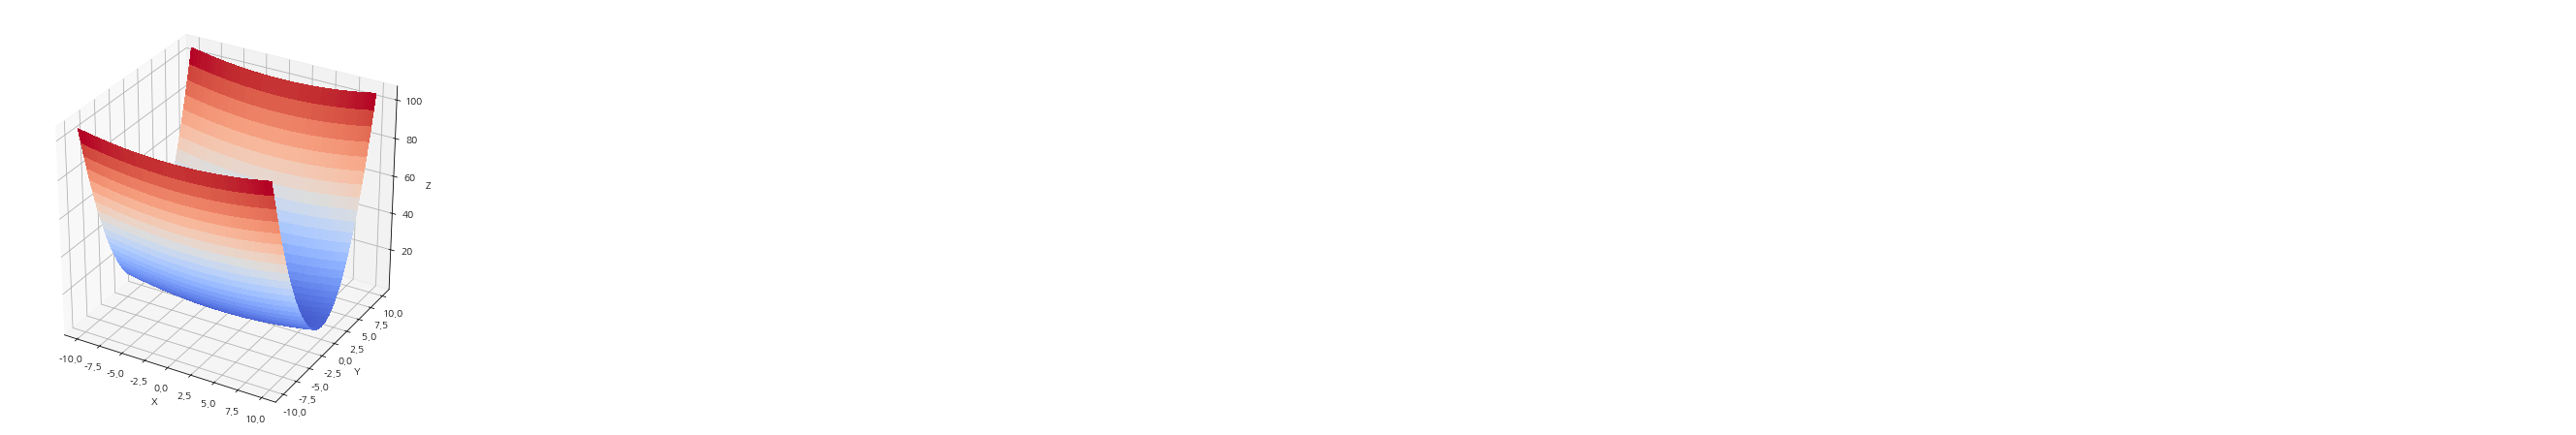

In [3]:
# [식 6.2]의 그래프 --- [그림 6-1]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def function_anisotropy(x):    # 비등방성 함수(anisotropy, 방향에 따라 기울기가 달라지는 함수)
    return x[0]**2 / 20.0 + x[1]**2

x = np.arange(-10, 10, 0.01)      # (2000, )
y = np.arange(-10, 10, 0.01)      # (1000, )

X, Y = np.meshgrid(x, y)        # meshgrid로 2차원 행렬 만들기 : X와 Y 모두 (1000, 2000)
Z = function_anisotropy(np.array([X, Y]))     # (2, 1000, 2000)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')     # 3차원 그래프

wire = ax.plot_wireframe(X, Y, Z, color='k', linewidth=0.1)
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
# fig.colorbar(surf, shrink=0.5, aspect=5)

Text(0, 0.5, 'y')

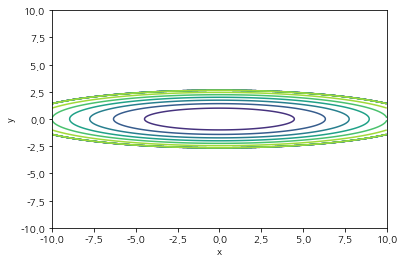

In [4]:
# [식 6.2]의 등고선 ---- [그림 6-2]

# 외곽선 단순화
mask = Z > 7
Z[mask] = 0

# 그래프 그리기
plt.contour(X, Y, Z)
plt.xlabel("x")
plt.ylabel("y")

- **$\normalsize f(x, y) = \frac{1}{20} x^2 + y^2$의 기울기**

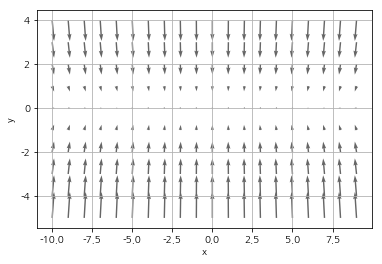

In [5]:
# [식 6-2]의 기울기 구현 (기울기에 마이너스를 붙인 벡터의 그래프) ---- [그림 6-3]
def gradient(X):
    grads = np.zeros_like(X)        # (2, 200)
    
    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 수치 미분 : ∂f/∂x = ( f(x+∆x, y) - f(x-∆x, y) ) / 2∆x,   ∂f/∂y = ( f(x, y+∆y) - f(x, y-∆y) ) / 2∆y
    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 해석적 미분
    for idx in range(X[0].size):       # numpy 배열을 크게 
        # df/dx = x/10
        grads[0] = (X[0] / 10.0) * 10       # 결과를 적당하게 키우기 위해 10을 곱함
        
        # df/dy = 2y
        grads[1] = (2.0 * X[1]) * 10          # 결과를 적당하게 키우기 위해 10(df/dx에 곱해준 값과 동일한 값)을 곱함

    return grads

x = np.arange(-10, 10, 1)       # (20, )       # 기울기를 화면에 그리기 위해서는 x와 y의 데이터 차원이 너무 크면 안됨(화살표가 너무 많아짐)
y = np.arange(-5, 5, 1)           # (10, )
X, Y = np.meshgrid(x, y)       # (10, 20)

Xf = X.flatten()             # (200, )
Yf = Y.flatten()             # (200, )

grads = gradient(np.array([Xf, Yf]))      # (2, 200)
    
plt.figure()
plt.quiver(Xf, Yf, -grads[0], -grads[1], angles="xy", color="#666666")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [6]:
grads[0]

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
         9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,
        -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,
         8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,
        -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,
         7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,
         0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
        -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -1

In [7]:
grads[1]

array([-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100,  -80,  -80,
        -80,  -80,  -80,  -80,  -80,  -80,  -80,  -80,  -80,  -80,  -80,
        -80,  -80,  -80,  -80,  -80,  -80,  -80,  -60,  -60,  -60,  -60,
        -60,  -60,  -60,  -60,  -60,  -60,  -60,  -60,  -60,  -60,  -60,
        -60,  -60,  -60,  -60,  -60,  -40,  -40,  -40,  -40,  -40,  -40,
        -40,  -40,  -40,  -40,  -40,  -40,  -40,  -40,  -40,  -40,  -40,
        -40,  -40,  -40,  -20,  -20,  -20,  -20,  -20,  -20,  -20,  -20,
        -20,  -20,  -20,  -20,  -20,  -20,  -20,  -20,  -20,  -20,  -20,
        -20,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   40,   40,   40,
         40,   40,   40,   40,   40,   40,   40,   

- 기울기는 $y$축 방향은 크고, $x$축 방향은 작다는 것이 특징. 즉, 그래프가 $y$축 방향은 가파른데, $x$축 방향은 완만함
- \[식 6.2]가 최소값이 되는 장소는 $(x, y) = (0, 0)$ 이지만, 위의 그래프가 보여주는 기울기 대부분은 $(0, 0)$ 방향을 가리키지 않고 있음

- **SGD에 의한 최적화 갱신 경로 : 최소값인 $(0, 0)$ 까지 지그재그로 이동하여 비효율적임.** $(x, y)$ 초기값은 $(-7.0, 2.0)$으로 설정함

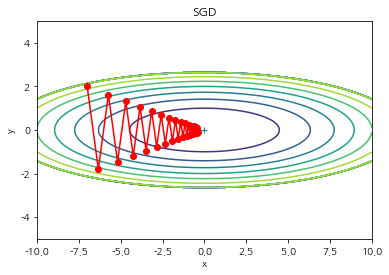

In [8]:
import sys, os
sys.path.append(os.pardir)     # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import SGD


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 해석적 미분(오차역전파법 미분) : df/dx = x/10,  df/dy = 2y


init_pos = (-7.0, 2.0)      # 파라미터 (x, y) 초기값 : params
params = {}
grads = {}


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    grads['x'], grads['y'] = 0, 0

    for i in range(30):     # 30번 학습
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.plot(x_history, y_history, 'o-', color="red")      # params 값 (x, y) 갱신 과정 그리기
    plt.contour(X, Y, Z)      # 등고선 그리기
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

- SGD는 위의 그래프와 같이 심하게 굽어진 움직임을 보여줌. 상당히 비효율적인 움직임
- SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최소값과 다른 방향을 가리키기 때문임
- 결론적으로, **SGD는 비등방성 함수(anisotropy, 방향에 따라 성질이, 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적임**
- **모멘텀, AdaGrid, Adam** 등이 SGD의 단점을 개선해주는 모델임

### [모멘텀]

- 모멘텀(momentum)은 "운동량"을 뜻하는 단어로 물리법칙과 관련 있음
- **모멘텀 수식** ---- \[식 6.3], \[6.4]
> $$\normalsize v \ \leftarrow \ \alpha \ v \ - \ \eta \ \frac{\delta L}{\delta W}$$ <br>
> $$\normalsize \matrix W \ \leftarrow \ + \ v$$ <br>
> - $\matrix W$는 갱신할 가중치 매개변수
> - $\large \frac{\delta L}{\delta W}$는 $\matrix W$에 대한 손실 함수의 기울기
> - $\normalsize \eta$는 학습률
> - $\normalsize v$는 물리학의 속도(velocity)에 해당하며, 위의 식은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리법칙을 나타내며, <br>
     모멘텀에 $\normalsize v$를 적용한 효과로, 최적화 갱신 과정은 공이 그릇의 바닥을 구르는 듯한 움직임을 보여줌
> - $\normalsize \alpha v$ 항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 함 <br>
     ($\normalsize \alpha$는 0.9 등의 값으로 설정하며, 물리에서는 지면 마찰이나 공기 저항에 해당함)

In [9]:
# 모멘텀 구현
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, value in params.items():
                self.v[key] = np.zeros_like(value)
            
            for key in params.keys():
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
                params[key] = self.v[key]

- **모멘텀에 의한 최적화 갱신 경로**

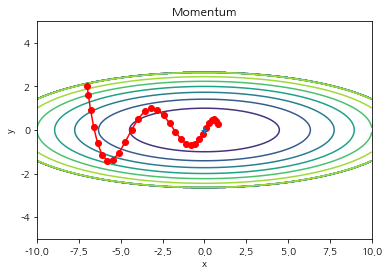

In [10]:
# 모멘텀에 의한 최적화 갱신 경로
import sys, os
sys.path.append(os.pardir)     # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import Momentum


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 해석적 미분(오차역전파법 미분) : df/dx = x/10,  df/dy = 2y


init_pos = (-7.0, 2.0)      # 파라미터 (x, y) 초기값 : params
params = {}
grads = {}


optimizers = OrderedDict()
optimizers["Momentum"] = Momentum(lr=0.1)

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    grads['x'], grads['y'] = 0, 0

    for i in range(30):     # 30번 학습
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.plot(x_history, y_history, 'o-', color="red")      # params 값 (x, y) 갱신 과정 그리기
    plt.contour(X, Y, Z)      # 등고선 그리기
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

- 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직임
> - $x$ 축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하고,
> - $y$ 축의 힘은 크지만 위아래로 번갈아 힘을 받아서 상충하여 $y$ 축 방향의 속도는 안정적이지 않음. <br>
> - 속도 탄력 때문에 (0, 0) 좌표를 지나쳤다가 학습을 더 반복하면 다시 (0, 0)을 찾아감 
- SGD 보다 $x$ 축 방향으로 빠르게 다가갈 수 있어서 지그재그 움직임을 줄일 수 있음

### [AdaGrid]

- 신경망 학습에서의 학습률(수식에서는 $\eta$로 표기) 값이 중요하며,
- 이 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하여 올바른 학습을 할 수 없음
- 학습률을 정하는 효과적인 기술로 **학습률 감소(learning rate decay)** 가 있음. 이는 학습을 진행하면서 학습률을 서서히 줄여가는 방법임
- **AdaGrid는 개별 매개변수에 적응적으로(adaptive) 학습률을 조정하면서 학습을 진행함**

- **AdaGrid 수식** ---- \[식 6.5], \[식 6.6]
> $$\normalsize h \ \leftarrow \ h \ + \ \frac{\delta L}{\delta W} \odot \frac{\delta L}{\delta W}$$ <br>
> $$\normalsize \matrix W \ \leftarrow \ \matrix W \ - \ \eta \ \frac{1}{\sqrt{h}} \ \frac{\delta L}{\delta W}$$ <br>
> - $\matrix W$는 갱신할 가중치 매개변수
> - $\large \frac{\delta L}{\delta W}$는 $\matrix W$에 대한 손실 함수의 기울기
> - $\normalsize \eta$ 는 학습률
> - $\normalsize h$ 는 기존 기울기 값을 제곱하여 계속 더해줌 ($\normalsize \odot$ 기호는 행렬의 원소별 곱셈을 의미)
> - 매개변수를 갱신할 때 $\large \frac{1}{\sqrt{h}}$ 을 곱해 학습률을 조정하며,
> - **매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻이며, 학습률 감소가 매개변수의 원소 마다 다르게 적용됨을 의미함**
> - AdaGrid는 과거의 기울기를 제곱하여 계속 더해가며, <br>
     학습을 진행할수록 갱신 강도가 약해져서, 무한히 계속 학습한다면 어느 순간 갱신량이 $0$이 되어 갱신되지 않게 됨
> - 이 문제를 개선한 **"RMSProp"**은 먼 과거의 기울기는 서시히 잊고 새로운 기울기 정보를 크게 반영함. <br>
     이를 **지수이동평균(Exponential Moving Average, EMA)** 이라 하며, 과거 기울기의 반영 규모를 기하급수적으로 감소시킴

In [11]:
# AdaGrid 구현
class AdaGrid:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            
            for key, value in params.items():
                self.v[key] = np.zeros_like(value)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]    # 행렬의 원소별 곱셈
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

- 마지막 줄에서 학습을 진행할수록 갱신 강도가 약해져서 np.sqrt(self.h\[key])가 0이 되는 것을 방지하기 위해 아주 작은 값(1e-7)을 더해줌 

- **AdaGrid에 의한 최적화 갱신 경로**

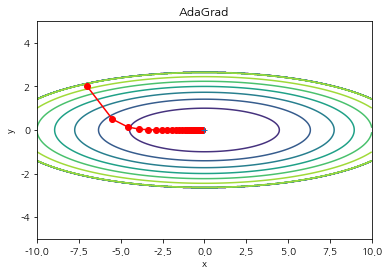

In [12]:
# AdaGrid에 의한 최적화 갱신 경로
import sys, os
sys.path.append(os.pardir)     # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import AdaGrad


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 해석적 미분(오차역전파법 미분) : df/dx = x/10,  df/dy = 2y


init_pos = (-7.0, 2.0)      # 파라미터 (x, y) 초기값 : params
params = {}
grads = {}


optimizers = OrderedDict()
optimizers["AdaGrad"] = AdaGrad(lr=1.5)

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    grads['x'], grads['y'] = 0, 0

    for i in range(30):     # 30번 학습
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.plot(x_history, y_history, 'o-', color="red")      # params 값 (x, y) 갱신 과정 그리기
    plt.contour(X, Y, Z)      # 등고선 그리기
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

- 최소값을 향해 효율적으로 움직이는 것을 알 수 있음
- $y$ 축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정됨

### [Adam]

- 모멘텀은 공이 그릇을 구르는 듯한 물리 법칙에 따른는 움직임을 보이며, AdaGrid는 매개변수의 원소마다 적응적으로 갱신 정도를 조정함
- Adam은 모멘텀과 AdaGrid 두가지 방법의 이점을 융합한 방법임
- Adam은 하이퍼파라미터의 "편향 보정"이 진행된다는 점도 특징임
- Adam은 학습률, $\beta_1$(1차 모멘텀 계수), $\beta_2$(2차 모멘텀 계수)을 하이퍼파라미터로 설정함 <br>
   논문에 따르면, 기본설정 값은 $\beta_1$은 0.9, $\beta_2$는 0.999이며, 많은 경우에 이 값으로 좋은 결과를 얻을 수 있음
- 구현된 클래스는 "common/optimizer.py" 참조

- **Adam에 의한 최적화 갱신 경로**

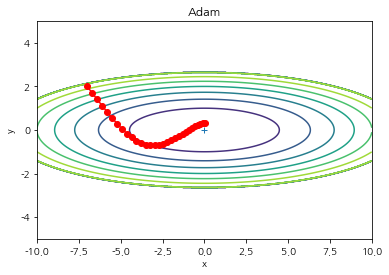

In [13]:
# Adam에 의한 최적화 갱신 경로
import sys, os
sys.path.append(os.pardir)     # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import Adam


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 해석적 미분(오차역전파법 미분) : df/dx = x/10,  df/dy = 2y


init_pos = (-7.0, 2.0)      # 파라미터 (x, y) 초기값 : params
params = {}
grads = {}


optimizers = OrderedDict()
optimizers["Adam"] = Adam(lr=0.3)

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    grads['x'], grads['y'] = 0, 0

    for i in range(30):     # 30번 학습
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.plot(x_history, y_history, 'o-', color="red")      # params 값 (x, y) 갱신 과정 그리기
    plt.contour(X, Y, Z)      # 등고선 그리기
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### [어느 갱신 방법을 이용할 것인가?]

- 갱신 성능은 풀어야 할 문제가 무엇이냐에 따라 달라질 수 있음
- 학습률 등의 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 달라질 수 있음
- Optimizer 별로 각자의 장단점이 있어서 잘 푸는 문제와 서툰 문제가 있음
- 이 책에서는 SGD와 Adam을 주로 사용하지만, 상황을 고려해 여러가지 Optimizer를 시도해볼 필요가 있음

### [MNIST 데이터셋으로 본 갱신 방법 비교]

- 소스 코드는 "ch06/optimizer_compare_mnist.py" 참조

- **MNIST 데이터셋에 대한 학습 진도 비교**

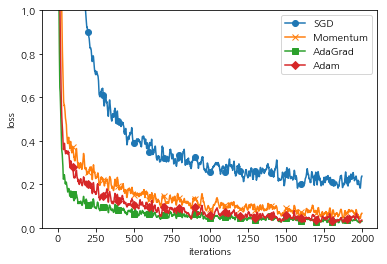

In [14]:
# MNIST 데이터셋에 대한 학습 진도 비교 
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve    # 손실 함수의 그래프를 매끄럽게 하기 위해 사용 (사용하지 않으면, 위 아래로 너무 넓게 퍼져 나옴)
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():          # 각 층은 100개의 뉴런으로 구성된 5층 신경망,  ReLU를 활성화 함수로 사용 (multi_layer_net.py 참조)
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    # loss 값 갱신 과정 출력
#     if (i % 100 == 0) or (i == max_iterations - 1):
#         print( "===========" + "iteration:" + str(i) + "===========")
#         for key in optimizers.keys():
#             loss = networks[key].loss(x_batch, t_batch)
#             print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

- 하이퍼파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과가 달라질 수 있음
- 일반적으로 SGD 보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높게 나타남

## 6.2 가중치의 초기값

- 신경망의 가중치 초기값을 무엇으로 설정 하느냐가 신경망 학습의 성패를 가르는 일이 실제로 자주 있음

### [가중치 초기값을 0으로 하면?]

- 오버피팅을 억제해 범용 성능을 높이는 테크닉인 **가중치 감소(weight decay)** 기법임 <br>
   가중치 감소는 가중치 매개변수의 값이 작아지도록 학습 하는 방법
- 가중치 초기값을 0으로 하면 학습이 올바로 이루어지지 않음 (가중치를 균일한 값으로 설정해서는 안됨) <br>
   이는 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문 <br>
   (**가중치들은 같은 초기값에서 시작하면 갱신을 거쳐도 여전히 같은 값을 유지하게 됨**)
- 가중치가 고르게 되어버리는 상황을 막으려면(가중치의 대칭적인 구조를 무너뜨리려면) **가중치 초기값을 무작위로 설정해야 함**

### [은닉층의 활성화 값 분포]

- 은닉층의 활성화 값(활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있음

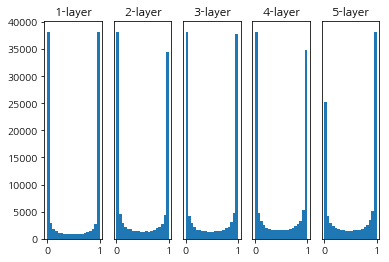

In [15]:
# 5층 신경망에 무작위로 생성한 데이터를 흘리며 각 층의 활성화 값 분포를 히스토그램으로 출력
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def ReLU(x):
    return np.maximum(0, x)

def weight_init_activation_histogram(init_std=1, n_node=100, f_activation=sigmoid, hist_range=(0, 1)):
    import numpy as np
    import matplotlib.pyplot as plt

    x = np.random.randn(1000, 100)   # 100개의 속성을 가진 1000개의 데이터
    node_num = n_node                       # 각 은닉층의 노드 수
    hidden_layer_size = 5         # 은닉층이 5개
    activations = {}                  # 각 은닉층의 활성화 결과(활성화 값)을 저장

    # 은닉층 활성화 값 계산
    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]

        w = np.random.randn(node_num, node_num) * init_std

        a = np.dot(x, w)
        z = f_activation(a)           # 활성화 함수로 인자로 받아서 적용 (default는 sigmoid)
        # z = sigmoid(a)
        # z = tanh(a)
        # z = ReLU(a)
        activations[i] = z

    # 히스토 그램 그리기
    for i, act in activations.items():
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + "-layer")
        plt.hist(act.flatten(), 20, range=hist_range)        # sigmoid, ReLU 함수 이용 시 range=(0, 1)
        # plt.hist(act.flatten(), 30, range=(-1, 1))          # tanh 함수 이용 시  range=(-1, 1)
        if i != 0:
            plt.yticks(())

    plt.show()
    
# 표준편차가 1인 정규분포를 이용한 가중치 초기값 (활성화 함수로 시그모이드 함수를 사용)
weight_init_activation_histogram(init_std=1)

- 표준편차가 1인 정규분포를 이용한 가중치 초기값을 사용한 경우, **각 층의 활성화 값들이 0과 1에 치우쳐 분포되어 있음**
- 여기서 사용한 활성화 함수인 시그모이드는 그 출력이 0 또는 1에 가까워지면, 그 미분은 0에 가까워지며, <br>
   **활성화 값(시그모이드 출력)이 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값(미분 값)이 점점 작아지다가 사라짐**
> $$\normalsize y = sigmoid(x) = \frac{1}{1 + exp(-x)} \\
       \normalsize \frac{\delta y}{\delta x} = (1 - y) \ y$$ <br>
- 이를 **"기울기 소실(gradient vanishing)"** 문제라 함

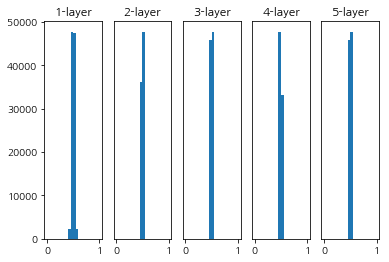

In [16]:
# 가중치 표준편차가 0.01인 경우의 각 층의 활성화 값 분포
weight_init_activation_histogram(init_std=0.01)

- 표준편차가 0.01인 정규분포를 이용한 가중치 초기값을 적용한 경우, **활성화 값이 0.5 부근에 집중됨**
- 활성화 값이 치우쳤다는 것은 **다수의 뉴런이 거의 같은 값을 출력하고 있어서, 뉴런(노드)을 여러 개 둔 의미가 없어짐**
- 활성화 값이 치우치는 경우 **표현력을 제한한다**는 관점에서 문제가 됨

#### <<Xavier 초기값>>>

- **각 층의 활성화 값은 적당히 고루 분포되어야 신경망 학습이 효율적으로 이루어짐**
- **Xavier 초기값** : 사비에르 글로로트(Xavier Glorot)와 요슈와 벤지오(Yoshua Bengio)의 논문에서 권장하는 가중치 초기값
    - 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있음
- 각 층의 활성화 값들을 광범위하게 분포시킬 목적으로 **"앞 계층의 노드가 n개라면 표준편차가 $\normalsize \frac{1}{\sqrt{n}}$인 정규분포를 사용"**

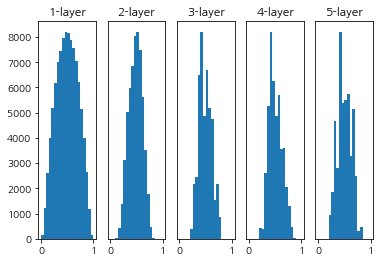

In [17]:
# Xivier 초기값을 적용한 경우, 각 층의 활성화 값 분포
node_num = 100
xavier = np.sqrt(1 / node_num)
weight_init_activation_histogram(init_std=xavier, n_node=node_num)

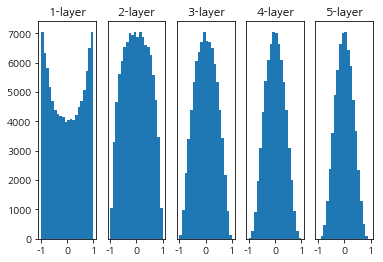

In [18]:
# tanh 활성화 함수에 Xivier 초기값을 적용한 경우, 각 층의 활성화 값 분포
node_num = 100
xavier = np.sqrt(1 / node_num)
weight_init_activation_histogram(init_std=xavier, n_node=node_num, f_activation=tanh, hist_range=(-1, 1))

- 층이 깊어지면서 형태가 다소 일그러지지만, 앞에서 본 방식보다는 확실히 넓게 분포됨
- 각 층에 흐르는 데이터는 적당히 퍼져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이루어질 것으로 기대됨
- **활성화 함수로 tanh 함수를 이용하면 말끔한 종 모양으로 분포됨.** 활성화 함수용으로는 원점에 대칭인 함수가 바람직하다고 알려져 있음

### [ReLU를 사용할 때의 가중치 초기값]

- Xavier 초기값은 활성화 함수가 선형인 것을 전제로 이끈 결과이며, <br>
   sigmoid와 tanh 함수는 좌우 대칭이라 중앙 부즌이 선형인 함수로 볼 수 있어서 Xavier 초기값이 적당함

---
#### <<He 초기값>>

- ReLU를 이용할 때는 ReLU에 특화된 초기값이 권장됨. 카이밍 히(Kaiming He)의 이름을 따서 **He 초기값**이라 함
- **He 초기값은 앞 계층의 노드가 n개 일때, $\normalsize \sqrt{\frac{2}{n}}$ 인 정규분포를 사용함**
- Xavier 초기값이 $\normalsize \frac{1}{\sqrt{n}}$인 것과 비교하면, <br>
   ReLU는 음의 영역의 출력값이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 직감적으로 해석할 수 있음

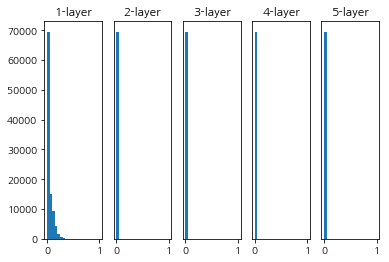

In [19]:
# 활성화 함수로 ReLU를 사용한 경우, 초기값에 정규분포 0.01을 사용한 활성화 값 분포
weight_init_activation_histogram(init_std=0.01, f_activation=ReLU)

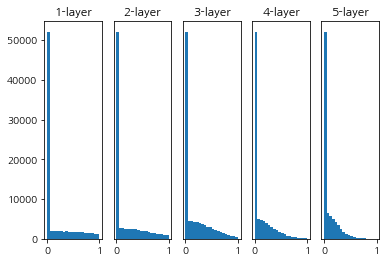

In [20]:
# 활성화 함수로 ReLU를 사용한 경우, Xivier 초기값에 따른 활성화 값 분포
node_num = 100
xavier = np.sqrt(1 / node_num)     # Xavier 초기값 : np.random.randn(node_num, node_num) * xavier
weight_init_activation_histogram(init_std=xavier, n_node=node_num, f_activation=ReLU)

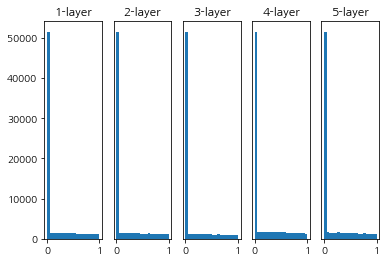

In [21]:
# 활성화 함수로 ReLU를 사용한 경우, He 초기값에 따른 활성화 값 분포
node_num = 100
he = np.sqrt(2 / node_num)     # He 초기값 : np.random.randn(node_num, node_num) * he
weight_init_activation_histogram(init_std=he, n_node=node_num, f_activation=ReLU)

- 활성화 함수로 ReLU를 사용한 경우,
- 표준편차가 0.01인 경우 활성화 값이 아주 작은 값들(0에 가까운 값)에 치우쳐서, 역전파 때 기울기가 작아져서 학습이 잘 이뤄지지 않음
- Xavier 초기값 결과는 층이 깊어지면서 치우침이 조금씩 커져서, 학습할 때 기울기 소실 문제를 일으킴
- He 초기값은 모든 층에서 균일하게 분포되었음. 층이 깊어져도 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것을 기대할 수 있음
- **활성화 함수로 ReLU를 사용할 때는 He 초기값을, sigmoid 함수나 tanh 함수 등의 S자형 곡선을 사용할 때는 Xavier 초기값을 사용** 하는 것이 현재의 모범 사례임

### [MNIST 데이터셋으로 본 가중치 초기값 비교]

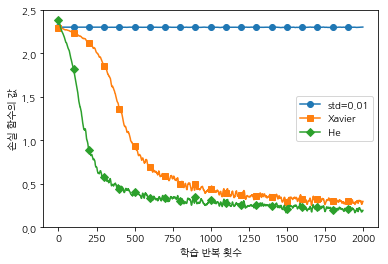

In [32]:
# 층별 뉴런 수가 100개인 5층 신경망에서 손실함수 그래프(활성화 함수는 ReLU, optimizer는 SDG)
# 표준편차 0.01, Xavier, He 초기값 설정 비교
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve     # 손실함수를 부드럽게 출력하기 위해 사용
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)      # activation='relu' (sigmoid'와 'relu' 중 선택, default 값은 'relu')
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
        
        # if (i % 100 == 0) or (i == (max_iterations - 1)):
        #     print("iteration:" + str(i) + ": " + key + " loss: " + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("학습 반복 횟수")
plt.ylabel("손실 함수의 값")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

- std=0.01일 때는 학습이 전혀 이뤄지지 않음
- Xavier와 He 초기값의 경우는 학습이 순조롭게 이뤄지고, 학습 진도는 He 초기값이 더 빠름

## 6.3 배치 정규화

- **배치 정규화(Batch Normalization)** 은 각 층의 활성화 값이 적당히 분포 되도록 강제(조정) 해보자는 아이디어에서 출발
- 아래와 같이 데이터 분포를 정규화 하는 **배치 정규화(Batch Norm) 계층을 신경망에 삽입**
> ![배치 정규화 신경망](./images/06001.jpg)

### [배치 정규화 알고리즘]

- **배치 정규화가 주목 받는 이유**
> - 학습을 빨리 진행할 수 있다(학습 속도 개선)
> - 초기값에 크게 의존하지 않는다(골치 아픈 초기값 선택 장애여 안녕!)
> - 오버피팅을 억제한다(드롭아웃 등의 필요성 감소)

---
- **배치 정규화 수식**
> $$\large \mu_B \ \leftarrow \ \frac{1}{m} \sum_{i=1}^{m} x_i$$ <br>
> $$\large \sigma_B^2 \ \leftarrow \ \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2$$ <br>
> $$\large \hat{x}_i \ \leftarrow \ \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$$ <br>
> - **학습 시 미니배치를 단위로, 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화**
> - **미니배치**(m 개의 입력 데이터의 집합) $\normalsize B = \{x_1, x_2, \cdots, x_m\}$에 대해, **평균** $\normalsize \mu_B$와 **분산** $\normalsize \sigma_B^2$을 구함
> - 입력 데이터를 평균이 0, 분산이 1이 되게(적절한 분포가 되게) 정규화 하여, $\normalsize \hat{B} = \{\hat{x}_1, \hat{x}_2, \cdots, \hat{x}_m\}$로 변환 함
> - $\normalsize \epsilon$(epsilon, 입실론) 기호는 작은 값(10e-7 등)으로 설정하며, 0으로 나누는 문제를 예방하는 역할
> - 배치 정규화를 활성화 함수의 앞(또는 뒤)에 삽입 함으로써 데이터 분포가 덜 치우치게 할 수 있음

---
- 배치 정규화 계층 마다 정규화된 데이터에 고유한 **확대(scale)와 이동(shift) 변환**을 수행
> $$\large y_i \ \leftarrow \ \gamma \hat{x}_i + \beta$$ <br>
> - $\normalsize \gamma$가 확대를, $\normalsize \beta$가 이동을 담당하며, 처음에는 $\normalsize \gamma = 1, \beta = 0$ 부터 시작하고, 학습하면서 적합한 값으로 조정해감

---
- **배치 정규화의 계산 그래프**
> ![배치 정규화 계산 그래프](./images/06002.jpg) <br>
> - 각 노드의 계산식에서 $\normalsize x_i$는 바로 앞 노드의 출력값을 의미

### [배치 정규화 효과]

- 배치 정규화를 사용하면 학습이 빨라지며, 가중치 초기값에 크게 의존하지 않아도 됨

epoch:0  |  train_acc: 0.066,   bn_train_acc: 0.093
epoch:1  |  train_acc: 0.086,   bn_train_acc: 0.144
epoch:2  |  train_acc: 0.116,   bn_train_acc: 0.274
epoch:3  |  train_acc: 0.138,   bn_train_acc: 0.42
epoch:4  |  train_acc: 0.165,   bn_train_acc: 0.519
epoch:5  |  train_acc: 0.189,   bn_train_acc: 0.566
epoch:6  |  train_acc: 0.199,   bn_train_acc: 0.61
epoch:7  |  train_acc: 0.222,   bn_train_acc: 0.639
epoch:8  |  train_acc: 0.233,   bn_train_acc: 0.671
epoch:9  |  train_acc: 0.238,   bn_train_acc: 0.7
epoch:10  |  train_acc: 0.247,   bn_train_acc: 0.72
epoch:11  |  train_acc: 0.249,   bn_train_acc: 0.737
epoch:12  |  train_acc: 0.265,   bn_train_acc: 0.746
epoch:13  |  train_acc: 0.275,   bn_train_acc: 0.746
epoch:14  |  train_acc: 0.279,   bn_train_acc: 0.764
epoch:15  |  train_acc: 0.279,   bn_train_acc: 0.771
epoch:16  |  train_acc: 0.271,   bn_train_acc: 0.778
epoch:17  |  train_acc: 0.285,   bn_train_acc: 0.779
epoch:18  |  train_acc: 0.302,   bn_train_acc: 0.787
epoch:19

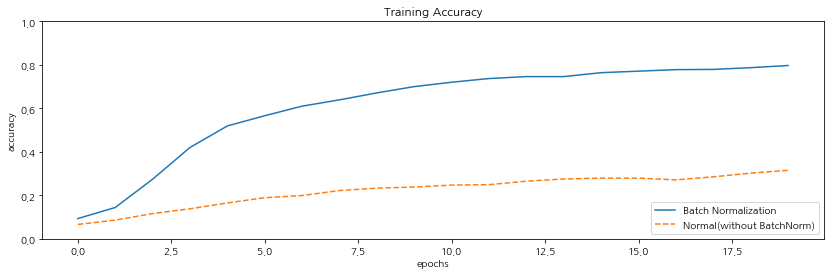

In [40]:
# MNIST 데이터셋을 사용하여 배치 정규화 계층을 사용할 때와 사용하지 않을 때 학습속도
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend     # 가중치 감소, 드롭아웃, 배치 정규화 옵션이 추가된 MultiLayerNet
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(activation, weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    activation=activation, weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + "  |  " + "train_acc: " + str(train_acc) + ",   bn_train_acc: " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 학습 하기 ==========
activation = 'sigmoid'
weight_init_std = 'xavier'
# activation = 'relu'
# weight_init_std = 'he'

train_acc_list, bn_train_acc_list = __train(activation, weight_init_std)


# 그래프 그리기 ==========
x = np.arange(max_epochs)
plt.subplot(1, 1, 1)
plt.title("Training Accuracy")
plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)

plt.ylim(0, 1.0)
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc='lower right')

plt.show()

## 6.4 바른 학습을 위해

- **오버피팅이란 신경망이 훈련 데이터에 만 지나치게 적응되어 그 외의 데이터에는 제대로 적응하지 못하는 상태를 말함**
- 훈련 데이터에 포함되지 않은, 아직 보지 못한 데이터가 주어져도 바르게 식별해내는 모델이 바람직함

### [오버피팅]

- **오버피팅은 주로 다음의 두 경우에 일어남**
> - **매개변수가 많고 표현력이 높은 모델**
> - **훈련 데이터가 적음**

In [81]:
# MNIST 데이터셋 오버피팅 시뮬레이션
import sys, os
sys.path.append(os.pardir)
from common.multi_layer_net import MultiLayerNet
from dataset.mnist import load_mnist
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅 재현을 위해 학습 데이터를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

max_epochs = 200
train_size = x_train.shape[0]
batch_size = 100

def train_and_calc_accuracy(weight_decay_lambda=0):      # 아래서 코드를 재사용하기 위해 함수로 정의함
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    iter_per_epochs = max(train_size / batch_size, 1)
    epoch_cnt = 0

    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                            weight_decay_lambda=weight_decay_lambda)
    optimizer = SGD(lr=0.01)

    for i in range(1000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grads = network.gradient(x_batch, t_batch)
        optimizer.update(network.params, grads)

        if i % iter_per_epochs == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)

            if i % (iter_per_epochs * 20) == 0:
                print("epoch: {:.0f}  |  train_acc: {:.3f},  test_acc: {:.3f}".format(epoch_cnt, train_acc, test_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    print("================================")
    print("epoch: {:.0f}  |  train_acc: {:.3f},  test_acc: {:.3f}".format(epoch_cnt, train_acc, test_acc))
    print("======= training complete !!! ========")
    
    return train_acc_list, test_acc_list

train_acc_list, test_acc_list = train_and_calc_accuracy()

epoch: 0  |  train_acc: 0.087,  test_acc: 0.101
epoch: 20  |  train_acc: 0.610,  test_acc: 0.449
epoch: 40  |  train_acc: 0.837,  test_acc: 0.619
epoch: 60  |  train_acc: 0.937,  test_acc: 0.696
epoch: 80  |  train_acc: 0.980,  test_acc: 0.725
epoch: 100  |  train_acc: 0.993,  test_acc: 0.735
epoch: 120  |  train_acc: 1.000,  test_acc: 0.737
epoch: 140  |  train_acc: 1.000,  test_acc: 0.745
epoch: 160  |  train_acc: 1.000,  test_acc: 0.748
epoch: 180  |  train_acc: 1.000,  test_acc: 0.751
epoch: 200  |  train_acc: 1.000,  test_acc: 0.751
======= training complete !!! ========


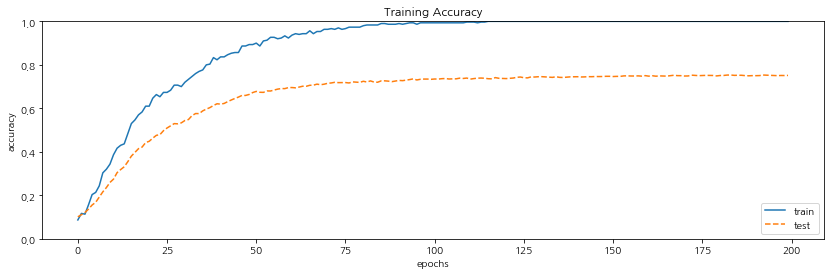

In [82]:
# 오버피팅 그래프
def display_accuracy():     # 아래서 코드를 재사용하기 위해 함수로 정의함
    x = np.arange(max_epochs)

    plt.subplot(1, 1, 1)
    plt.title("Training Accuracy")
    plt.plot(x, train_acc_list, label='train', markevery=10)
    plt.plot(x, test_acc_list, linestyle = "--", label='test', markevery=10)

    plt.ylim(0, 1.0)
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend(loc='lower right')

    plt.show()

display_accuracy()

- 훈련 데이터를 사용하여 측정한 정확도는 100 에폭을 지나는 무렵부터 거의 100% 이지만, 시험 데이터에 대해서는 큰 차이를 보임
- **이처럼 정확도가 크게 벌어지는 것은 훈련 데이터에만 적응(fitting) 된 결과임**

### [가중치 감소]

- **가중치 감소(gradient decay)는 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 패널티를 부과하여 오버피팅을 억제하는 방법이며,** <br>
   원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문
- 신경망 학습의 목적은 손실함수의 값을 줄이는 것이며, 가중치 제곱 법칙(L2 법칙)을 손실함수에 더하면 가중치가 커지는 것을 억제할 수 있음
- 가중치를 $W$라 하면, L2 법칙에 따른 가중치 감소는 $\normalsize \frac{1}{2} \lambda W^2$이고, 이 **$\normalsize \frac{1}{2} \lambda W^2$를 손실함수에 더함**
- $\normalsize \lambda$는 정규화의 세기를 조절하는 하이퍼파라미터 이며, **$\normalsize \lambda$를 크게 설정할수록 큰 가중치에 대한 패널티가 커짐**
- 가중치 감소는 모든 가중치 각각의 손실함수에 $\normalsize \frac{1}{2} \lambda W^2$를 더하며, <br>
   **가중치 기울기를 구하는 계산에서는 그동안의 오차역전파법에 따른 결과에, 정규화 항을 미분한 $\normalsize \lambda W$를 더함**
---
- 가중치 $\normalsize W = \{w_1, w_2, \cdots, w_n\}$ 라면, <br>
- L2 법칙은 각 원소의 제곱들을 더한 것에 해당하며, L2 법칙에서는 $\normalsize \sqrt{w_1 + w_2 + \cdots + w_n}$ 으로 계산할 수 있음
- L1 법칙은 절대값의 합 $\normalsize ( |w_1| + |w_2| + \cdots + |w_n| )$에 해당함
- L$\infty$ 법칙은 Max 법칙이라고도 하며, 각 원소의 절대값 중 가장 큰 것에 해당함 $\normalsize (max \{ |w_1|, |w_2|, \cdots, |w_n| \})$

epoch: 0  |  train_acc: 0.097,  test_acc: 0.092
epoch: 20  |  train_acc: 0.337,  test_acc: 0.248
epoch: 40  |  train_acc: 0.507,  test_acc: 0.356
epoch: 60  |  train_acc: 0.650,  test_acc: 0.495
epoch: 80  |  train_acc: 0.767,  test_acc: 0.605
epoch: 100  |  train_acc: 0.833,  test_acc: 0.649
epoch: 120  |  train_acc: 0.843,  test_acc: 0.678
epoch: 140  |  train_acc: 0.860,  test_acc: 0.687
epoch: 160  |  train_acc: 0.883,  test_acc: 0.697
epoch: 180  |  train_acc: 0.883,  test_acc: 0.703
epoch: 200  |  train_acc: 0.893,  test_acc: 0.703
======= training complete !!! ========


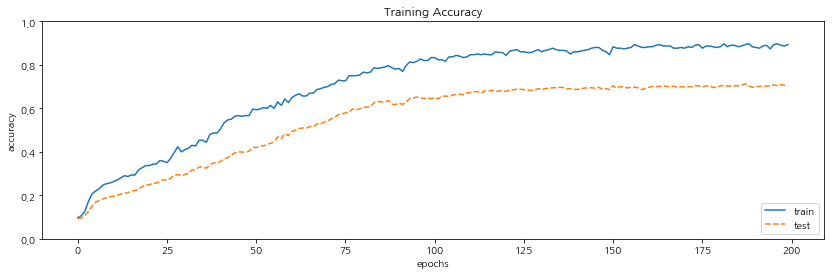

In [83]:
# MNIST 데이터셋 오버피팅 시뮬레이션(가중치 감소 적용)
# 가중치 감소를 적용한 네트워크는 common/multi_layer_net.py에 구현되어 있음 (default는 weight_decay_lambda=0)
train_acc_list, test_acc_list = train_and_calc_accuracy(weight_decay_lambda=0.1)      # 𝜆 를 0.1 로 설정 (𝜆 가 너무 크면 학습이 이뤄지지 않음)
display_accuracy()

- 훈련 데이터에 대한 정확도가 100%에 도달하지 못하고, 89%에서 멈춤 (테스트 데이터와의 정확도 GAP이 다소 줄어들었음)

### [드롭아웃]

- 가중치 감소는 간단하게 구현할 수 있고 어느 정도 지나친 학습을 억제할 수 있으나, <br>
   신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려워짐
- **드롭아웃(dropout) 기법은 뉴런을 임의로 삭제하면서 학습하는 방법이며, 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제함**
- 드롭아웃으로 삭제된 뉴런은 신호를 전달하지 않게 되며, 훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, <br>
   시험 때는 모든 뉴런에 신호를 전달함 (시험 때는 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력함. 삭제한 비율을 곱하지 않아도 됨)
- **훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시** (x와 형상이 같은 무작위 배열을 생성해서, dropout_ratio 보다 큰 원소만 True로 설정)
- 역전파 때의 동작은 ReLU와 같음. 즉, 순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고, <br>
   **순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단함**
- 더 효율적인 구현 방법은 "**[체이너 프레임워크](http://chainer.org/)**"의 드롭아웃 구현을 참고 

In [101]:
# 드롭아웃 적용 테스트(dropout_ratio=0.5)
# Trainer 클래스(commom/trainer.py)에 신경망 학습 코드가 별도 구현되어 있음
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비율 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.15   # 데이터가 너무 작아서 dropout_ratio를 너무 작게 하면 학습이 너무 더디게 이루어짐
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=False)       # 학습 과정을 출력 하려면 verbose=True 로 설정
trainer.train()

dropout_train_acc_list, dropout_test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 결과 비교를 위해 dropout을 적용하지 않은 네트워크 학습(use_dropout=False)
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=False, dropout_ration=dropout_ratio)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=False)       # 학습 과정을 출력 하려면 verbose=True 로 설정
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

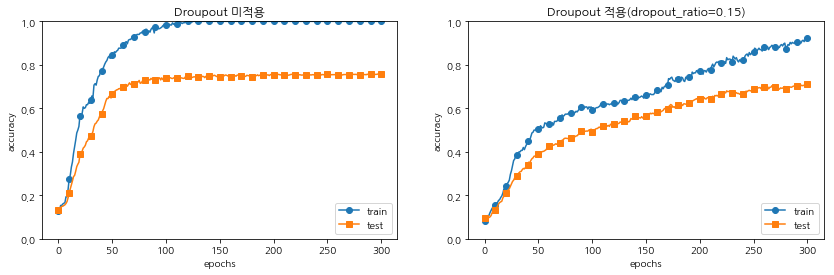

In [102]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

fig, axes = plt.subplots(1, 2)
for ax, (train_acc_list, test_acc_list) in zip(axes, [(train_acc_list, test_acc_list), (dropout_train_acc_list, dropout_test_acc_list)]):
    ax.plot(x, train_acc_list, marker='o', label='train', markevery=10)
    ax.plot(x, test_acc_list, marker='s', label='test', markevery=10)
    ax.set_xlabel("epochs")
    ax.set_ylabel("accuracy")
    ax.set_ylim(0, 1.0)
    ax.legend(loc='lower right')

axes[0].set_title("Droupout 미적용")
axes[1].set_title("Droupout 적용(dropout_ratio=0.15)")

plt.show()

- 훈련 데이터와 테스트 데이터의 정확도 차이가 줄었음
- 드롭아웃을 이용하면 표현력을 높이면서도 오버피팅을 억제할 수 있음
---
- 기계학습에서는 **앙상블 학습(ensemble learning)** 을 애용하며, 앙상블 학습은 개별적으로 학습시킨 여러 모델의 출력을 평균(투표 등) 내어 추론하는 방식임
- 드롭아웃이 학습 때 뉴런을 무작위로 삭제하는 행위를 매번 다른 모델을 학습 시키는 것으로 해석할 수 있음
- **드롭아웃은 앙상블 학습과 같은 효과를 하나의 네트워크로 구현했다고 생각할 수 있음**

## 6.5 적절한 하이퍼파라미터 값 찾기

- 신경망에서 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률, 가중치 감소 계수 등 사람이 적절한 값을 직접 설정해야 하는 값을 하이퍼파라미터라 함
- 하이퍼파라미터 값을 결정하기까지는 일반적으로 많은 시행착오를 겪게 됨

### [검증 데이터]

- **하이퍼파라미터를 다양한 값으로 설정하고 검증할 때는 시험 데이터를 사용하면 안됨** <br>
   (시험 데이터를 사용하여 하이퍼파라미터를 조정하면, 하이퍼파라미터 값이 시험데이터에 오버피팅 되기 때문)
- **하이퍼파라미터를 조정할 때는 하이퍼파라미터 전용 확인 데이터(검증 데이터, validation data)가 필요** 하며, <br>
   학습 데이터 중 20% 정도를 검증 데이터로 먼저 분리한 후 나머지 80% 학습 데이터 만으로 훈련
- 훈련 데이터에서 검증 데이터를 분리하기 전에는 먼저 입력 데이터와 정답 레이블을 섞은 후 분리해야 함(레이블 값이 한 쪽으로 치우치는 것을 방지)

In [105]:
# 검증 데이터 분리
from dataset.mnist import load_mnist
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)      # shuffle_dataset()는 np.random.shuffle() 함수로 구현되어 있음

# 20% 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### [하이퍼파라미터 최적화]

- **하이퍼파라미터를 최적화할 때 핵심은 하이퍼파라미터의 최적 값이 존재하는 범위를 조금씩 줄여가며 찾아야 한다는 것**
- 하이퍼파라미터의 최적화에서는 그리드 서치(grid search) 같은 규칙적인 탐색보다는 무작위로 샘플링 해 탐색하는 편이 좋은 결과를 낸다고 알려져 있음
- 하이퍼파라미터의 범위는 대략적으로 지정하는 것이 효과적이며, 0.001~1,000 사이($\small 10^{-3}, 10^{-2}, \cdots, 10^{3}$ 등)의 로그 스케일(log scale)로 지정
- 딥러닝 학습에는 오랜 시간이 걸리기 때문에, 학습을 위한 에폭을 작게 하여 1회 평가에 걸리는 시간을 단축하는 것이 효과적임
- 여기에서 설명한 최적화 방법은 수행자의 지혜와 직관에 의존적이며, 더 세련된 기법을 원하면 **[베이즈 최적화(Bayesian optimization)](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=2ahUKEwj-8ZfW4d3fAhXBTrwKHauDDWAQFjAAegQIChAC&url=https%3A%2F%2Fpapers.nips.cc%2Fpaper%2F4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf&usg=AOvVaw1vwF0dYZpS1XkJbJjbuRIG)** 참고

#### <<하이퍼파라미터 최적화 과정>>
- **0단계 : 하이퍼파라미터 값의 범위를 설정한다.**
- **1단계 : 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다.**
- **2단계 : 1단계에서 샘플링 한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가한다.(에폭은 작게 설정한다.)**
- **3단계 : 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.**
- **이상을 반복하여 하이퍼파라미터의 범위를 좁혀하고, 어느 정도 좁아지면 그 압축한 범위에서 값을 하나 골라냅니다.**

### [하이퍼파라미터 최적화 구현하기]

In [107]:
# 하이퍼파라미터 무작위 추출 코드
weight_decay = 10 ** np.random.uniform(-8, -4)       # 가중치 감소 계수를 10^(-8) ~ 10^(-4) 값으로 설정
lr = 10 ** np.random.uniform(-6, -2)         # 학습률을 10^(-6) ~ 10^(-2) 값으로 설정

In [118]:
# 하이퍼파라미터 값에 따른 훈련 데이터와 검증 데이터에 대한 정확도 비교
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for i in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)        # weight_decay와 lr를 무작위로 설정했기 때문에 100번 trial 동안 정확도가 들죽날죽함
    if (i % 10 == 0) or (i == (optimization_trial - 1)):
        print("trial:" + str(i) + " | val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list
    
print("==========optimization_trial complete!!! ===============")

trial:0 | val acc:0.23 | lr:0.0004896182185007021, weight decay:6.333451568405779e-08
trial:10 | val acc:0.12 | lr:0.0001567521787361043, weight decay:6.888905393697051e-05
trial:20 | val acc:0.12 | lr:0.00013296475946361326, weight decay:1.1120088052227087e-08
trial:30 | val acc:0.14 | lr:0.00024236120882042302, weight decay:2.144179025600052e-05
trial:40 | val acc:0.14 | lr:2.2041257554951515e-06, weight decay:1.0951924757368225e-08
trial:50 | val acc:0.81 | lr:0.007856912378749876, weight decay:1.6120447105695416e-07
trial:60 | val acc:0.11 | lr:1.6941327997997245e-05, weight decay:1.26821911286997e-07
trial:70 | val acc:0.12 | lr:8.216214338764444e-05, weight decay:1.6085451358321487e-06
trial:80 | val acc:0.13 | lr:2.7011241166440208e-05, weight decay:1.958485977856615e-06
trial:90 | val acc:0.07 | lr:2.1216096825182436e-05, weight decay:2.0875091675224684e-08
trial:99 | val acc:0.1 | lr:2.992103954718447e-05, weight decay:2.9374467435896966e-05
==========optimization_trial comple

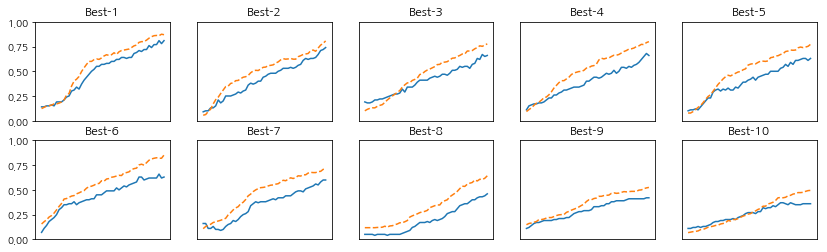

In [119]:
# 그래프 그리기========================================================
# print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 10
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):   # 정확도가 높은 순으로 정렬 후 그래프 그리기
    # print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()